<a href="https://colab.research.google.com/github/Ankit455/14_days_challenge/blob/ankit/ankit/Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
df  = pd.read_csv('drive/MyDrive/financials.csv')
print(df.head())

  Symbol                 Name                  Sector   Price  Price/Earnings  \
0    MMM           3M Company             Industrials  222.89           24.31   
1    AOS      A.O. Smith Corp             Industrials   60.24           27.76   
2    ABT  Abbott Laboratories             Health Care   56.27           22.51   
3   ABBV          AbbVie Inc.             Health Care  108.48           19.41   
4    ACN        Accenture plc  Information Technology  150.51           25.47   

   Dividend Yield  Earnings/Share  52 Week Low  52 Week High    Market Cap  \
0        2.332862            7.92       259.77       175.490  1.387211e+11   
1        1.147959            1.70        68.39        48.925  1.078342e+10   
2        1.908982            0.26        64.60        42.280  1.021210e+11   
3        2.499560            3.29       125.86        60.050  1.813863e+11   
4        1.714470            5.44       162.60       114.820  9.876586e+10   

         EBITDA  Price/Sales  Price/Book  \


# New Section

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB
None


In [ ]:
df.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64

In [ ]:
df = df.dropna().head(50)
df.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64

In [ ]:
df1= df.loc[:,['52 Week Low','52 Week High']]
df1.head(5)

,52 Week Low,52 Week High
0,259.77,175.490
1,68.39,48.925
2,64.60,42.280
3,125.86,60.050
4,162.60,114.820


In [ ]:
r,c = df.shape
print(r,c)

505 14


In [ ]:
print(df.describe())


            Price  Price/Earnings  Dividend Yield  Earnings/Share  \
count   20.000000       20.000000       20.000000       20.000000   
mean   106.510000       30.991000        1.480700        4.855000   
std     59.155562       37.957537        1.283868        4.239713   
min     10.060000        9.660000        0.000000       -1.720000   
25%     63.652500       18.192500        0.411724        1.667500   
50%    106.830000       23.365000        1.174186        4.415000   
75%    151.082500       27.527500        2.357123        7.552500   
max    222.890000      187.000000        4.961832       13.660000   

       52 Week Low  52 Week High    Market Cap        EBITDA  Price/Sales  \
count    20.000000     20.000000  2.000000e+01  2.000000e+01    20.000000   
mean    129.343500     82.828805  4.568229e+10  2.677373e+09     4.520701   
std      70.771182     47.168770  5.107358e+10  2.939704e+09     3.512549   
min      12.050000      9.700000  6.242378e+09  0.000000e+00     0.659

In [ ]:
name = df['Name'].head(10)
price = df['Price'].head(10)
high52 = df['52 Week High'].head(10)
low52 = df['52 Week Low'].head(10)


fig = plt.figure(figsize=(10,5))
plt.bar(name,price,color='blue',width=0.2)
plt.show()

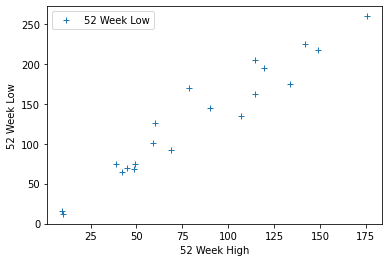

In [ ]:
df.plot(x='52 Week High', y='52 Week Low', style='+')
plt.xlabel('52 Week High')
plt.ylabel('52 Week Low')
plt.show()

In [ ]:
X = pd.DataFrame(df['52 Week High'])
y = pd.DataFrame(df['52 Week Low'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(6, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

[13.40387996]


In [ ]:
print(regressor.coef_)

[[1.39623434]]


In [ ]:
y_test_predict = regressor.predict(X_test)
print(y_test_predict)

[[ 97.24775219]
 [ 75.74574332]
 [211.66915651]
 [ 27.36622338]
 [ 72.43666793]
 [ 82.14049661]]


Text(0, 0.5, 'Ratings')

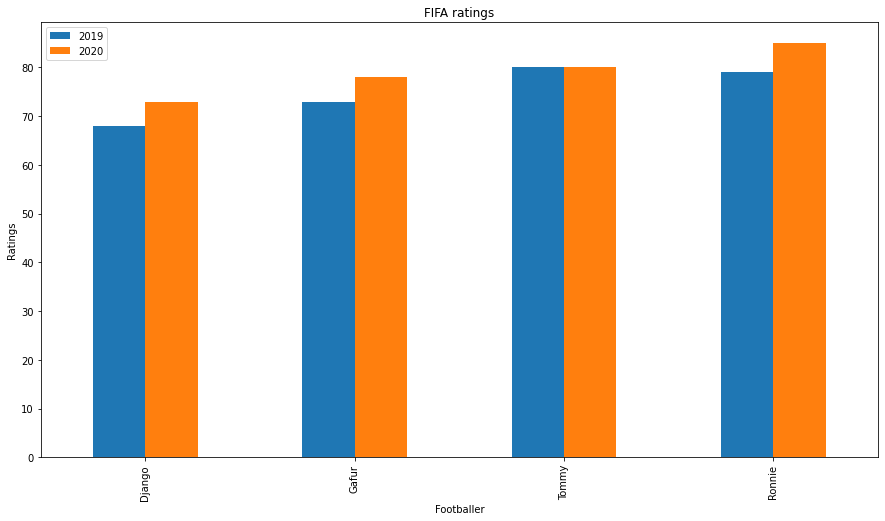

In [3]:
plotdata = pd.DataFrame({

    "2019":[68,73,80,79],

    "2020":[73,78,80,85]},

    index=["Django", "Gafur", "Tommy", "Ronnie"])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.title("FIFA ratings")

plt.xlabel("Footballer")

plt.ylabel("Ratings")